In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('laptopPrice.csv')

In [3]:
df.head(5)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [4]:
df.tail(5)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0
822,Lenovo,AMD,Ryzen 5,10th,8 GB,DDR4,512 GB,0 GB,DOS,64-bit,0 GB,ThinNlight,No warranty,No,No,57490,4 stars,18,4


In [5]:
df.sample(5)

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
351,ASUS,Intel,Core i5,11th,8 GB,LPDDR4X,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,Yes,No,99990,3 stars,0,0
768,ASUS,AMD,Ryzen 7,Not Available,4 GB,DDR4,512 GB,0 GB,Windows,32-bit,4 GB,Casual,No warranty,No,No,79990,3 stars,0,0
553,MSI,Intel,Core i7,12th,16 GB,DDR4,1024 GB,0 GB,Windows,64-bit,6 GB,Casual,No warranty,No,No,139990,4 stars,4,2
50,DELL,Intel,Core i3,11th,8 GB,DDR4,256 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,41990,4 stars,216,21
233,ASUS,Intel,Core i5,11th,16 GB,DDR4,512 GB,0 GB,Windows,64-bit,6 GB,Gaming,1 year,No,Yes,89990,4 stars,124,17


In [6]:
df.shape

(823, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [8]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


# duplicates and outliers

In [9]:
df.duplicated().sum()

21

In [10]:
df=df.drop_duplicates()

In [11]:
from scipy import stats
numerical_columns = ['Price', 'Number of Ratings', 'Number of Reviews']
 
df = df[(np.abs(stats.zscore(df[numerical_columns])) < 3).all(axis=1)]

In [12]:
df.shape

(768, 19)

# EDA analysis

In [13]:
df.nunique()

brand                  8
processor_brand        3
processor_name        11
processor_gnrtn        8
ram_gb                 4
ram_type               6
ssd                    6
hdd                    4
os                     3
os_bit                 2
graphic_card_gb        5
weight                 3
warranty               4
Touchscreen            2
msoffice               2
Price                388
rating                 5
Number of Ratings    268
Number of Reviews    122
dtype: int64

In [14]:
num_cols=['Price','Number of Ratings','Number of Reviews']

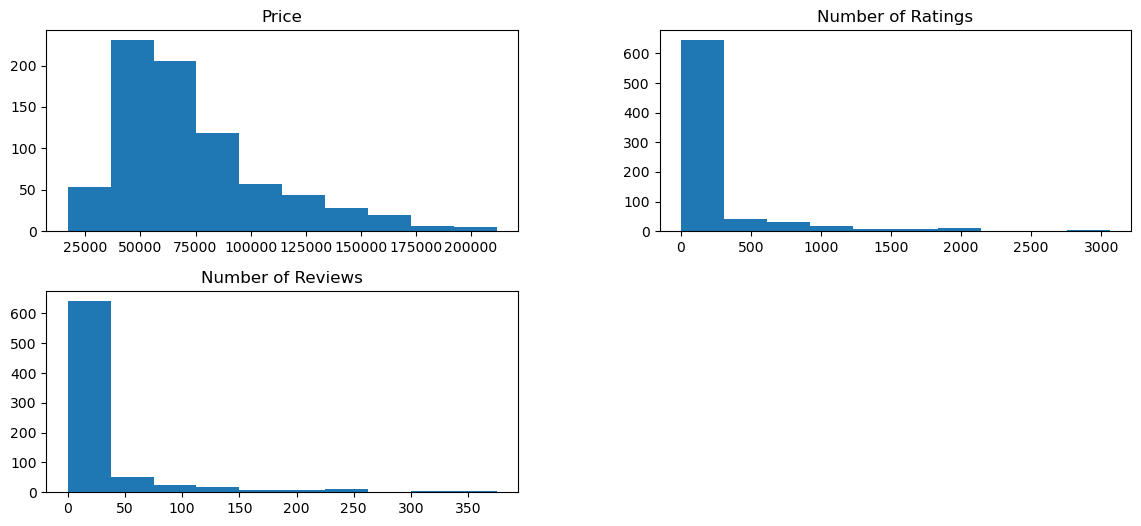

In [15]:
axes = df[num_cols].hist(figsize=(14, 6))
for ax in axes.flatten():
    ax.grid(False)
plt.show()

Text(0.5, 1.0, 'count of laptops by brand')

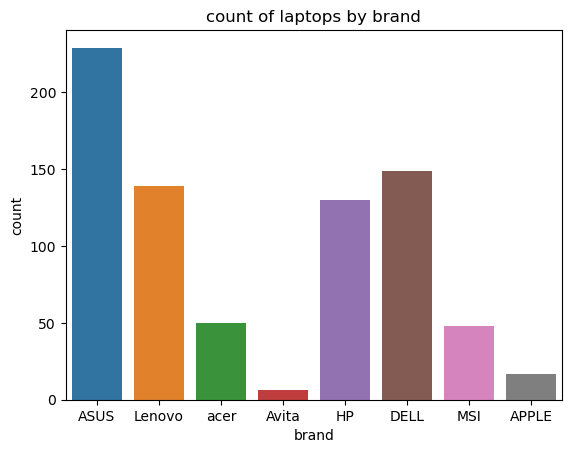

In [16]:
sns.countplot(x=df.brand)
plt.title("count of laptops by brand")

Text(0.5, 1.0, 'count of laptops by processor_brand')

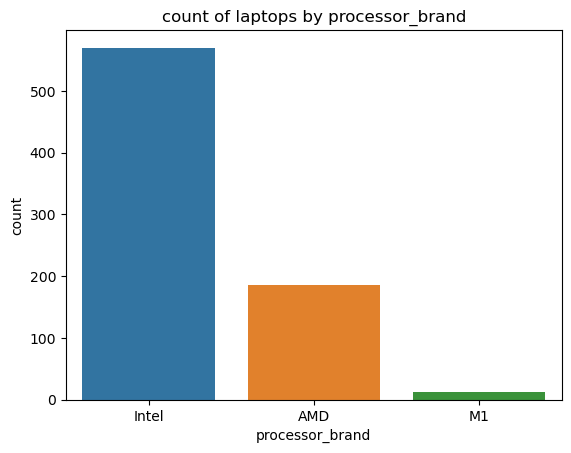

In [17]:
sns.countplot(x=df.processor_brand)
plt.title("count of laptops by processor_brand")

Text(0.5, 1.0, 'count of laptops by processor_name')

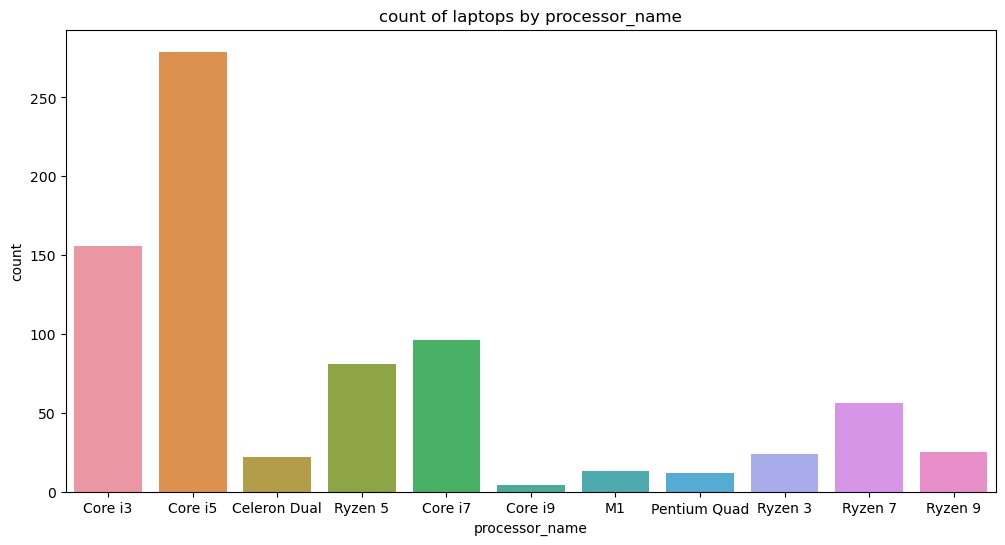

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df.processor_name)
plt.title("count of laptops by processor_name")

Text(0.5, 1.0, 'count of laptops by processor generation')

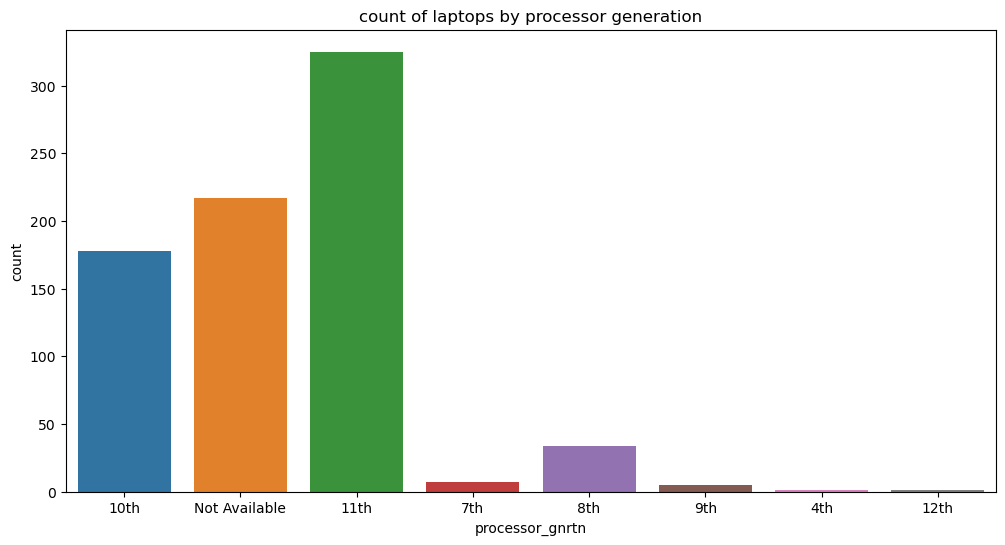

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df.processor_gnrtn)
plt.title("count of laptops by processor generation")

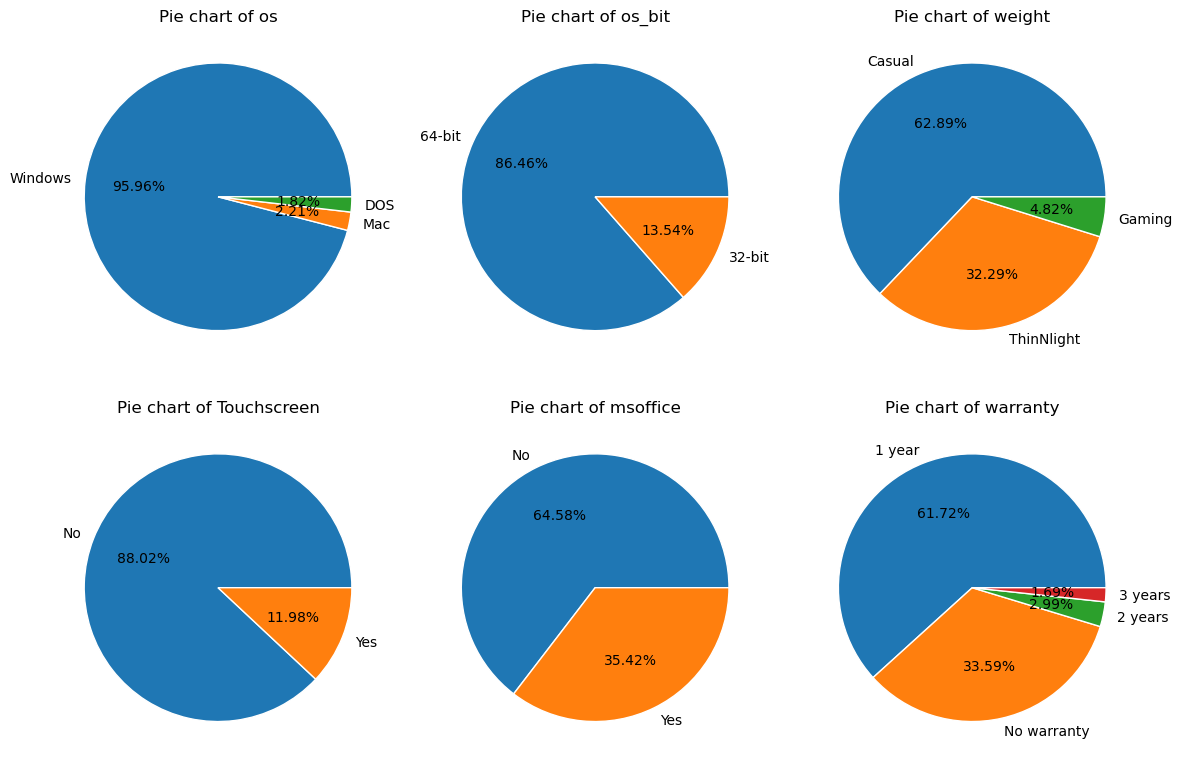

In [20]:
plt.figure(figsize=(12, 8))
cols = ['os', 'os_bit', 'weight', 'Touchscreen', 'msoffice', 'warranty']

for count, col in enumerate(cols):
    plt.subplot(2, 3, count + 1)   
    tmp_df = df[col].value_counts().reset_index()
    tmp_df.columns = ['category', 'count']
    
    plt.pie(tmp_df['count'], labels=tmp_df['category'], wedgeprops={'edgecolor': 'white'}, autopct='%1.2f%%')
    
    
    plt.title(f'Pie chart of {col}')


plt.tight_layout()
plt.show()

# data Preprocessing

In [21]:
categorical_vriables=df.columns[df.dtypes=='object']

In [22]:
categorical_vriables

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating'],
      dtype='object')

In [23]:

df=df.drop(columns=['Number of Ratings','Number of Reviews'])


In [24]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars


In [25]:
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

In [26]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars


In [27]:
X=df.drop(columns=['Price'])
Y=df['Price']


In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
ohe=OneHotEncoder()
ohe.fit(X[['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating']])

OneHotEncoder()

In [29]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'rating']),remainder='passthrough')

# train test split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=77)

# model:Linear regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)

In [34]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['APPLE', 'ASUS', 'Avita', 'DELL', 'HP', 'Lenovo', 'MSI', 'acer'],
      dtype=object),
                                                                            array(['AMD', 'Intel', 'M1'], dtype=object),
                                                                            array(['Celeron Dual', 'Core i3', 'Core i5', 'Core i7', 'Core i9', 'M1',
       'Pentium Quad', 'Ryzen 3', 'Ryzen 5',...
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], dtype=object)]),
                                                  ['brand', 'processor_brand',
                                                   'processor_name',
                                                   'processor_gnrtn', 'ram_gb',
                                                   'ram_type', 'ssd', 'hdd',
                                                   'os', 'os_bit',
                                                   'graphic_card_gb', 'weight',
                                                   'warranty', 'Touchscreen',
                                                   'msoffice', 'rating'])])),
                ('linearregression', LinearRegression())])

In [35]:
y_pred=pipe.predict(X_test)

In [36]:
pipe.score(X_train,y_train)


0.8419389237555414

In [37]:
pipe.score(X_test,y_test)

0.8252637059126556

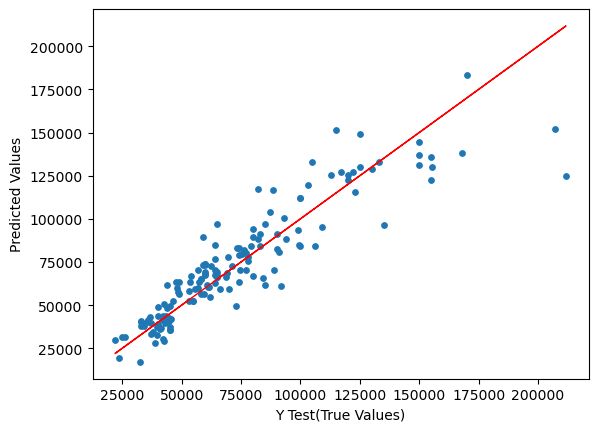

In [38]:
plt.scatter(y_test,y_pred,s=15)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Predicted Values')
plt.plot(y_test, y_test, color='red', lw=1)

plt.show()

In [39]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [40]:
mse

223975322.79383507

In [41]:
rmse = np.sqrt(mse)
rmse

14965.805116793252

In [42]:
import pickle
filename='laptop_price2.sav'
pickle.dump(pipe,open(filename,'wb'))